# Analysis of Long/Short Equity, Machine Learning, Sentiment Strategy

## (aka) "The Laggard"

#### Author: Mark Black
#### Date: 7/8/17

*Before we dive into the analysis I want to make it clear that I did not author this strategy but merely examining the merits and assessing it's potential at the backtest vetting stage.*

In this research paper we examine a strategy that uses Machine Learning and Sentiment Analysis to rebalance the long/short equity portfolio.

The original backtest/strategy can be found here:
https://www.quantopian.com/posts/psychsignal-and-machine-learning-models-v2#59604875403f8c000d53da18

The structure of this research paper will be broken up into 3 sections: 

1. The initial results of the strategy posted by the author.
2. Analysis/breakdown of the Python code by functions to try to intuitively understand the parameters of the strategy.
3. We examine some saliet potential pitfalls of the strategy in order to assess whether or not to move forward into the next stage: live paper trading.


## Original Backtest

Some salient parameters of the original backtest that potentially skew the backtest results:

1. Initial capital: $10,000
2. Window period: 01/01/2015-07/05/2017
3. RandomForestClassifier as the machine learning model
4. PsychSignal's sentiment indicator, specifically "aggregated_twitter_withretweets_stocktwits"
5. No Commission
6. Leverage (at end of the day) is constrained to 1.0

I will only make 1 modification to the stategy. In order to make the final comparison more "apples to apples" I will modify the initial capital to $1,000,000.

Here are the backtest results

In [31]:
bt_orig = get_backtest('5961031e1d9f824de2c76156')

100% Time: 0:00:01|###########################################################|


It is worth noting that the sample period is the same as the backtest period.

Entire data start date: 2015-01-02
Entire data end date: 2017-07-05


Backtest Months: 30


Performance statistics,Backtest
annual_return,0.23
cum_returns_final,0.68
annual_volatility,0.18
sharpe_ratio,1.26
calmar_ratio,1.84
stability_of_timeseries,0.82
max_drawdown,-0.13
omega_ratio,1.44
sortino_ratio,2.05
skew,0.77


Worst drawdown periods,net drawdown in %,peak date,valley date,recovery date,duration
0,12.52,2015-08-07,2015-10-22,2016-03-17,160
1,10.64,2016-09-08,2016-11-09,2017-02-08,110
2,9.71,2017-05-17,2017-06-23,NaT,NaN
3,8.97,2016-03-31,2016-06-23,2016-09-08,116
4,4.34,2015-02-20,2015-03-19,2015-04-27,47




[-0.021 -0.04 ]


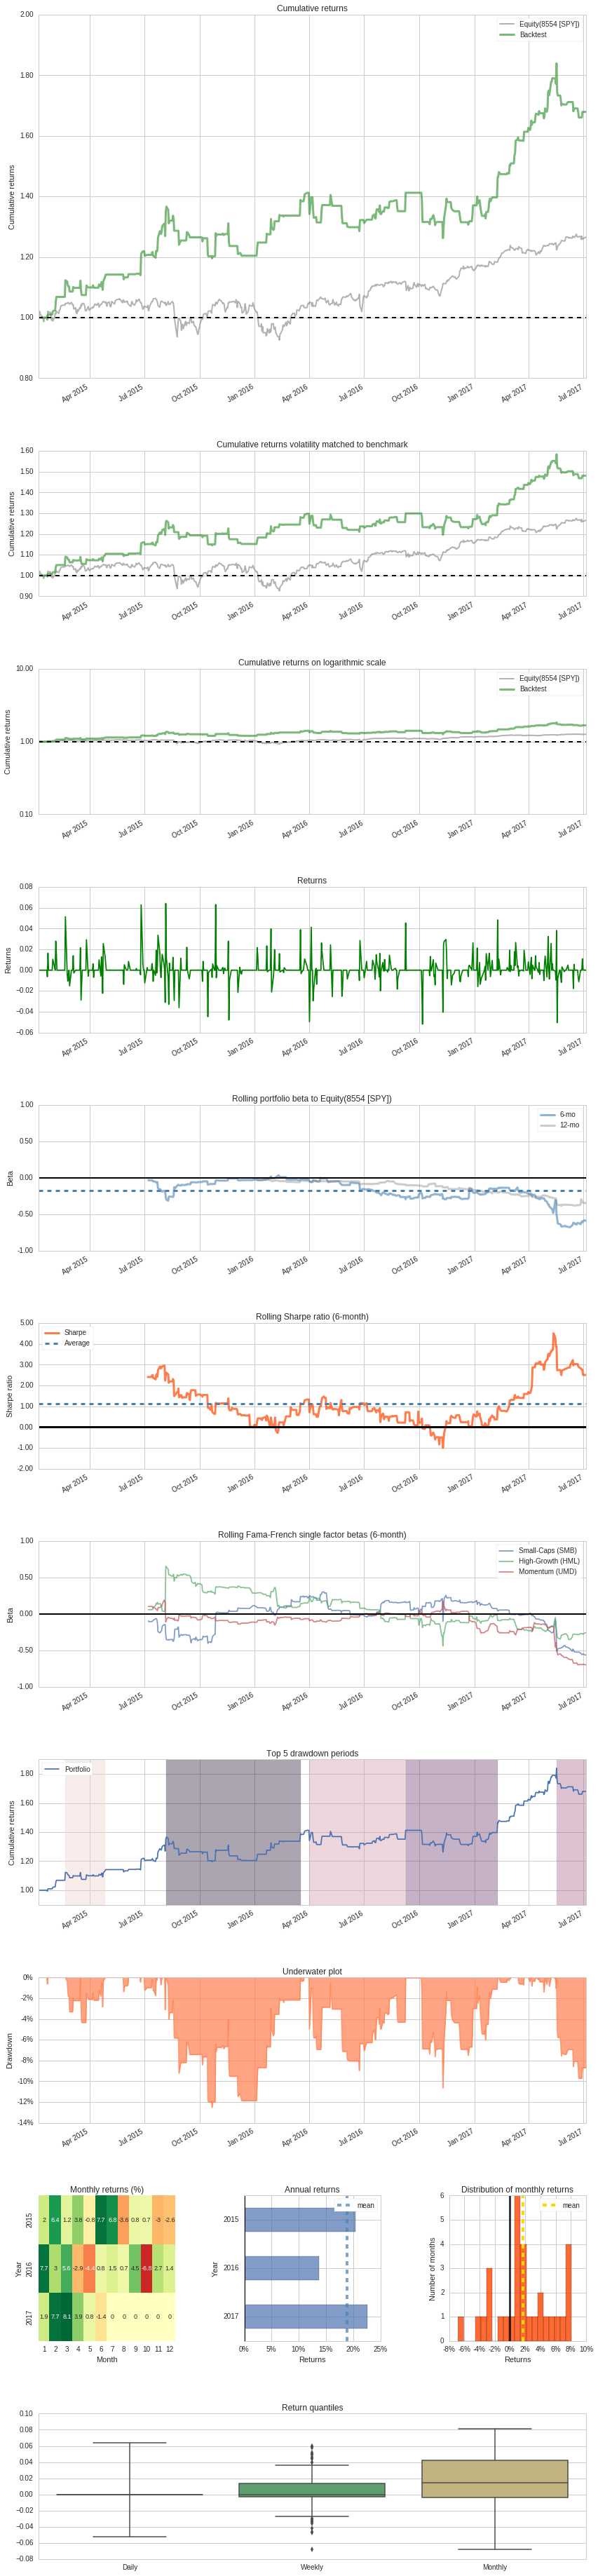

Stress Events,mean,min,max
Fall2015,-0.13%,-3.61%,2.20%
New Normal,0.09%,-5.20%,6.43%


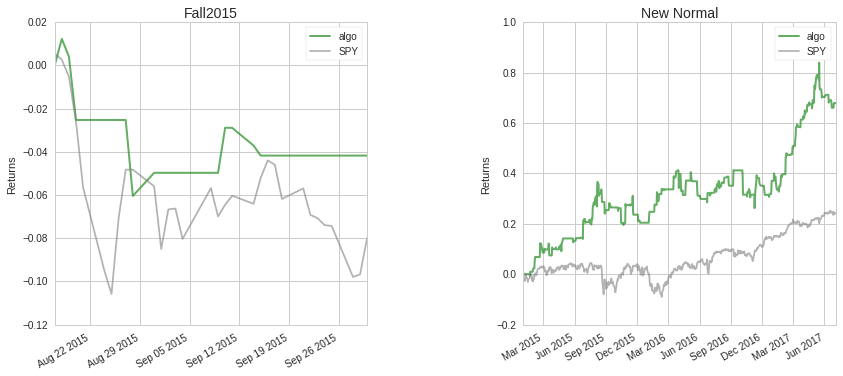

Top 10 long positions of all time,max
BURL-45558,104.38%
CRM-26401,103.34%
TSLA-39840,102.75%
ORCL-5692,102.70%
MON-22140,102.63%
GOOG_L-26578,102.23%
AMGN-368,101.96%
BIIB-3806,101.88%
INCY-10187,101.06%
ULTA-34953,100.99%


Top 10 short positions of all time,max
BIIB-3806,-110.17%
GOOG_L-26578,-106.85%
TSLA-39840,-106.00%
AVGO-38650,-105.04%
INTU-8655,-104.90%
REGN-6413,-104.85%
CMG-28016,-104.55%
CELG-1406,-103.78%
AMGN-368,-103.49%
GS-20088,-103.39%


Top 10 positions of all time,max
BIIB-3806,110.17%
GOOG_L-26578,106.85%
TSLA-39840,106.00%
AVGO-38650,105.04%
INTU-8655,104.90%
REGN-6413,104.85%
CMG-28016,104.55%
BURL-45558,104.38%
CELG-1406,103.78%
AMGN-368,103.49%


All positions ever held,max
BIIB-3806,110.17%
GOOG_L-26578,106.85%
TSLA-39840,106.00%
AVGO-38650,105.04%
INTU-8655,104.90%
REGN-6413,104.85%
CMG-28016,104.55%
BURL-45558,104.38%
CELG-1406,103.78%
AMGN-368,103.49%


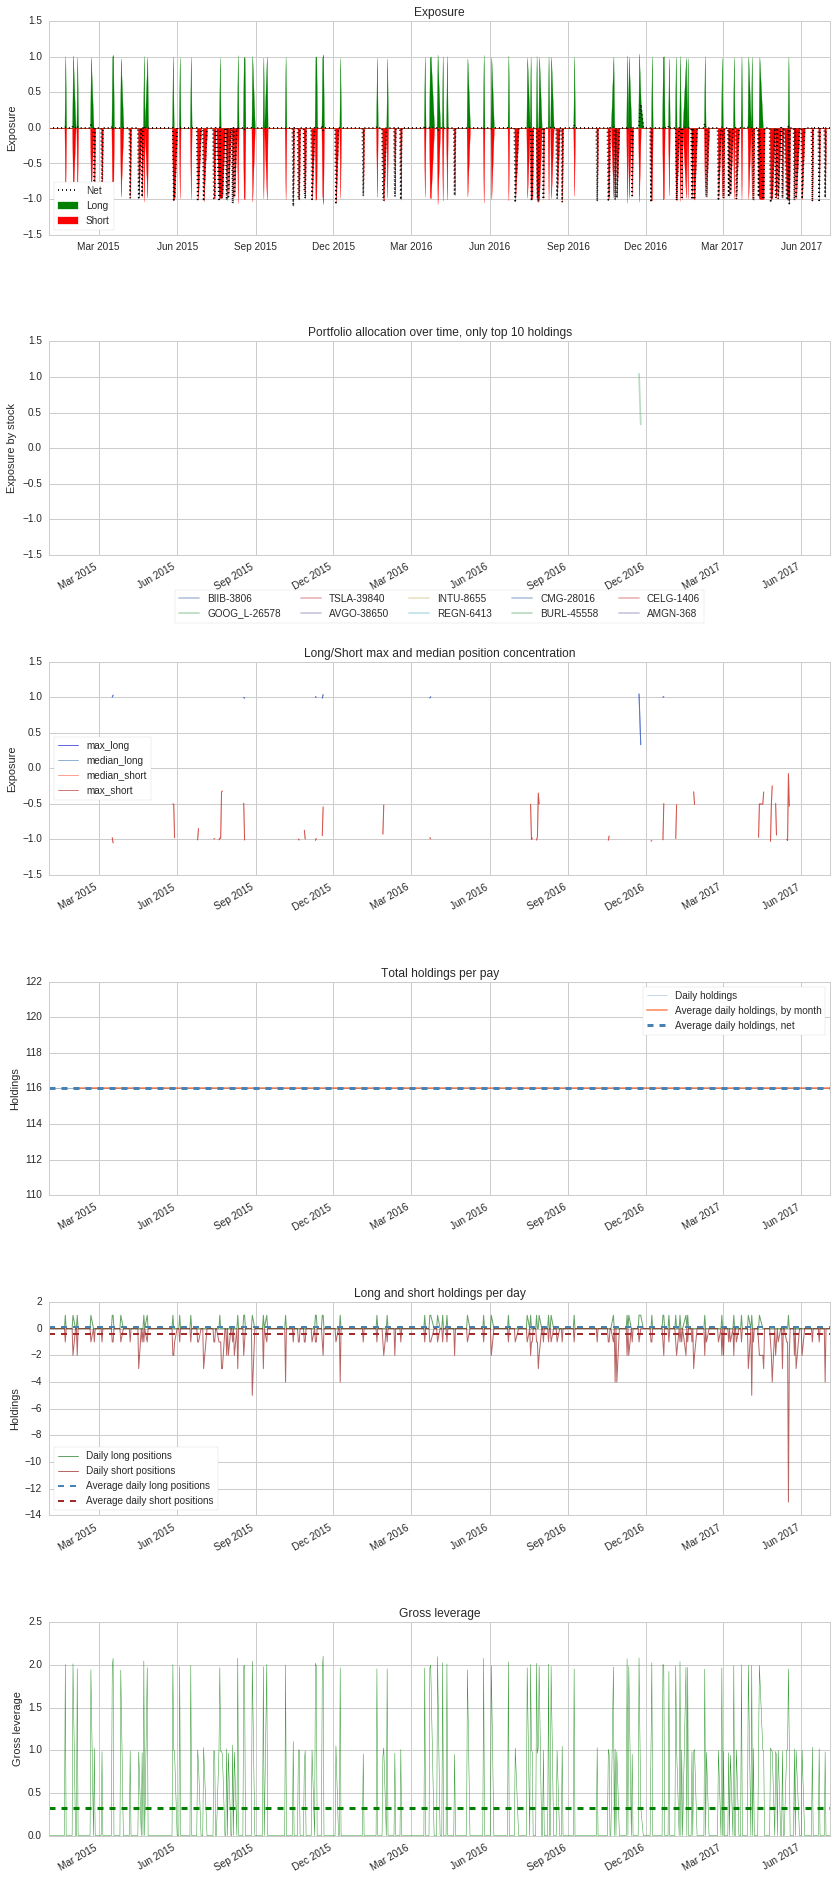

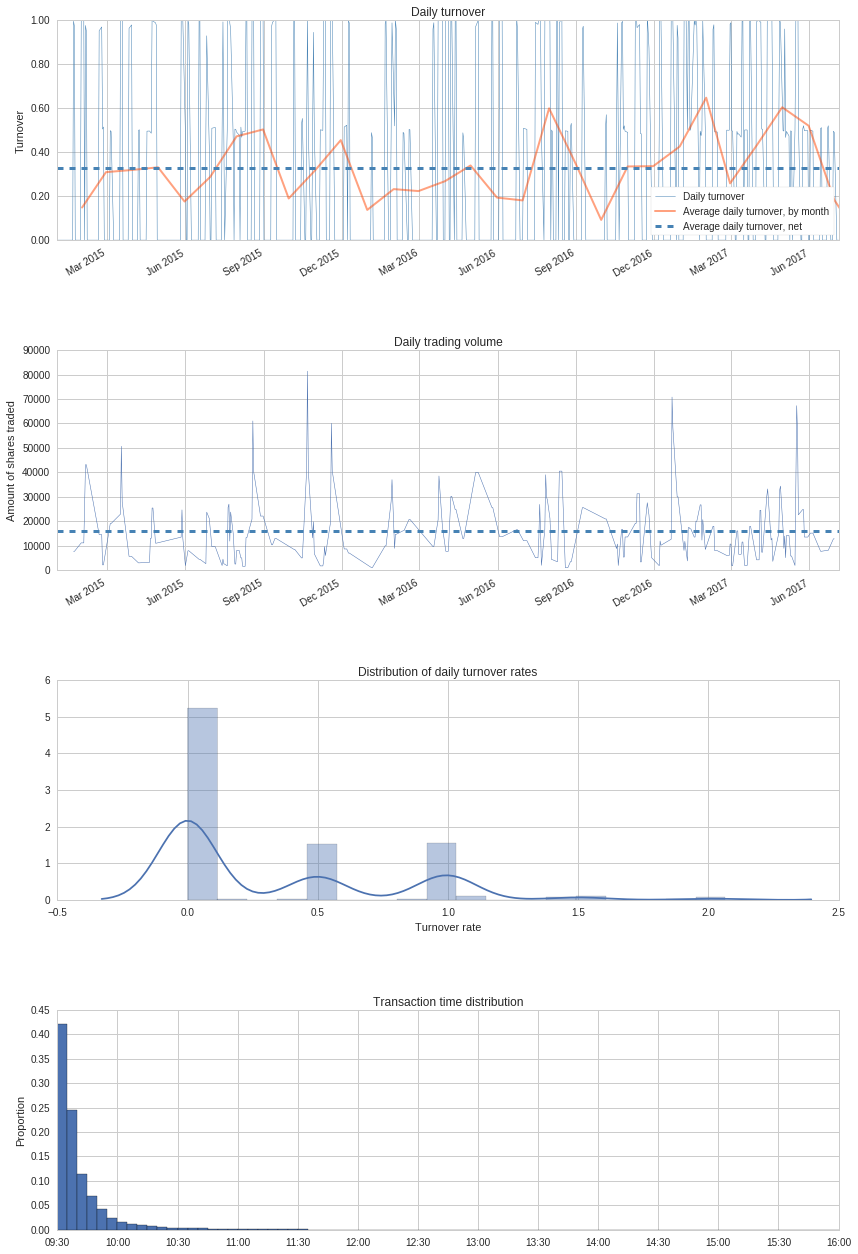

In [32]:
bt_orig.create_full_tear_sheet()

## Analysis of the Strategy

In the Quant world there is an on-going debate about strategy generation using financial intuition versus the feasibility of data mining techniques. This paper does not try to engage in that discussion but does want to approach the merits of this particular algorithm from a more intuitive level.

In this section we will do a simple cursory walkthrough of the Python code so that we can from understand the structure of this trading algorithm and what it is trying to do.

Import necessary libraies

In [34]:
from quantopian.pipeline import Pipeline, CustomFilter
#from quantopian.algorithm import attach_pipeline, pipeline_output
from quantopian.pipeline.factors import Latest
from quantopian.pipeline.data.builtin import USEquityPricing
from quantopian.pipeline.data.psychsignal import aggregated_twitter_withretweets_stocktwits as st
from sklearn.ensemble import RandomForestClassifier
from quantopian.pipeline.factors import SimpleMovingAverage
from quantopian.pipeline.filters import Q500US
import numpy as np

The **initialize** function from Quantopian's own definition: *initialize(context) is a required setup method for initializing state or other bookkeeping. This method is called only once at the beginning of your algorithm. context is an augmented Python dictionary used for maintaining state during your backtest or live trading session. context should be used instead of global variables in the algorithm. Properties can be accessed using dot notation (context.some_property).*

Here we set some global variables like the model as RFC, some parameters for the RFC and set the schedule functions to tell the algorithm how often to trade/run and at what times to run.

The last **set.commission** does not set any trade commissions.

In [35]:
def initialize(context): 
    context.securities_in_results = []
    attach_pipeline(Custom_pipeline(context), 'Custom_pipeline')   
    context.model = RandomForestClassifier()
    context.model.n_estimators = 500
    context.model.min_samples_leaf = 100
    context.lookback = 3 # Look back 3 days
    context.history_range = 5
    schedule_function(trade, date_rules.every_day(), time_rules.market_open())
    schedule_function(end, date_rules.every_day(), time_rules.market_close(minutes = 30))
    set_commission(commission.PerShare(cost=0.0, min_trade_cost=0.0))

In the **Custom_pipeline** function we set the universe for the longs and shorts by screening the top 500 US according to PsychSignal's sentiment indicator. The chosen sentiment indicator is fed from both Twitter and Stocktwits and measures a securities bullish or bearish reading based on retweet characteristics.

PsychSignal **aggregated_twitter_withretweets_stocktwits** indicator:
https://www.quantopian.com/data/psychsignal/aggregated_twitter_withretweets_stocktwits

More information on PsychSignal: https://psychsignal.com/

In [36]:
def Custom_pipeline(context):
    set_symbol_lookup_date('2016-1-1')  
    pipe = Pipeline()
    sma_10 = SimpleMovingAverage(inputs = [USEquityPricing.close], window_length=10)
    sma_50 = SimpleMovingAverage(inputs = [USEquityPricing.close], window_length=50)
    pipe.add(st.bull_scored_messages .latest, 'bull_scored_messages')
    pipe.add(st.bear_scored_messages .latest, 'bear_scored_messages')
    pipe.set_screen(Q500US() & (  ((0.35*st.bull_scored_messages.latest > st.bear_scored_messages.latest) & (st.bear_scored_messages.latest > 10)) or ((0.35*st.bear_scored_messages.latest > st.bull_scored_messages.latest) & (st.bull_scored_messages.latest > 10)) ) )
    return pipe

Next in the **trade** function we define the shorts and longs lists.

The if statement starts the Machine Learning RFC model processes. The 2 parameters of the model are recent prices and volume changes for the designated securities. 

It then walks forward the most recent price and volume changes fitting it to the classification model producing either a numerical value > 1 (long the longs basket of securities) or < -1 (short the shorts basket of securities).

In [37]:
def trade (context, data):
    shorts= []
    longs= []
    if len(context.securities_in_results) > 0.0:                    
        for sec in context.securities_in_results:
           
            recent_prices, recent_volumes = data.history(sec, 'price', context.history_range, '1d').values, data.history(sec, 'volume', context.history_range, '1d').values
            price_changes, volume_changes = np.diff(recent_prices).tolist(), np.diff(recent_volumes).tolist()
            X,Y = [],[]
            
            for i in range(context.history_range-context.lookback-1): 
                X.append(price_changes[i:i+context.lookback] + volume_changes[i:i+context.lookback])
                Y.append(price_changes[i+context.lookback])
                
            context.model.fit(X, Y) 
            recent_prices, recent_volumes = data.history(sec, 'price', context.lookback+1, '1d').values, data.history(sec, 'volume', context.lookback+1, '1d').values
            price_changes, volume_changes = np.diff(recent_prices).tolist(), np.diff(recent_volumes).tolist()
            prediction = context.model.predict(price_changes + volume_changes)
            
            if prediction > 1.0: 
                print(str(sec.symbol) +  " | " + str(prediction))
                if sec not in context.portfolio.positions:
                    longs.append(sec)
                    
            if prediction < -1.0: 
                if sec not in context.portfolio.positions:
                    shorts.append(sec)
    if len(longs) == 0 or len(shorts) == 0:
        longs = []
        shorts = []
    for sec in longs:
        order_target_percent(sec,1/len(longs) )
    for sec in shorts:
        order_target_percent(sec,-1.0/len(shorts) )
    for sec in context.portfolio.positions:
        if sec not in longs and sec not in shorts:
            order_target_percent(sec, 0.0)

The **end** function merely tracks things like leverage on a daily basis of the portfolio.

In [38]:
def end (context, data):
    #for sec in context.portfolio.positions:
     #   order_target_percent(sec, 0.0)
    record(Leverage = context.account.leverage,pos=len(context.portfolio.positions),
           resutls=len(context.securities_in_results))

## Full Backtest

The only modification I will make to the strategy is extending the window to start at "2012-01-03"

In [39]:
bt_mod = get_backtest('5960f24d182f7c4de9835428')

100% Time: 0:00:03|###########################################################|


Entire data start date: 2012-01-03
Entire data end date: 2017-07-05


Out-of-Sample Months: 30
Backtest Months: 35


Performance statistics,All history,Backtest,Out of sample
annual_return,0.10,0.00,0.23
cum_returns_final,0.70,0.01,0.68
annual_volatility,0.15,0.12,0.18
sharpe_ratio,0.72,0.09,1.26
calmar_ratio,0.47,0.02,1.83
stability_of_timeseries,0.66,0.31,0.82
max_drawdown,-0.21,-0.21,-0.13
omega_ratio,1.31,1.05,1.44
sortino_ratio,1.10,0.13,2.05
skew,0.08,-1.90,0.77


Worst drawdown periods,net drawdown in %,peak date,valley date,recovery date,duration
0,21.49,2013-10-17,2014-02-27,2015-04-27,398
1,12.53,2015-08-07,2015-10-22,2016-03-17,160
2,10.66,2016-09-08,2016-11-09,2017-02-08,110
3,9.70,2017-05-17,2017-06-23,NaT,NaN
4,8.97,2016-03-31,2016-06-23,2016-09-08,116




[-0.018 -0.035]


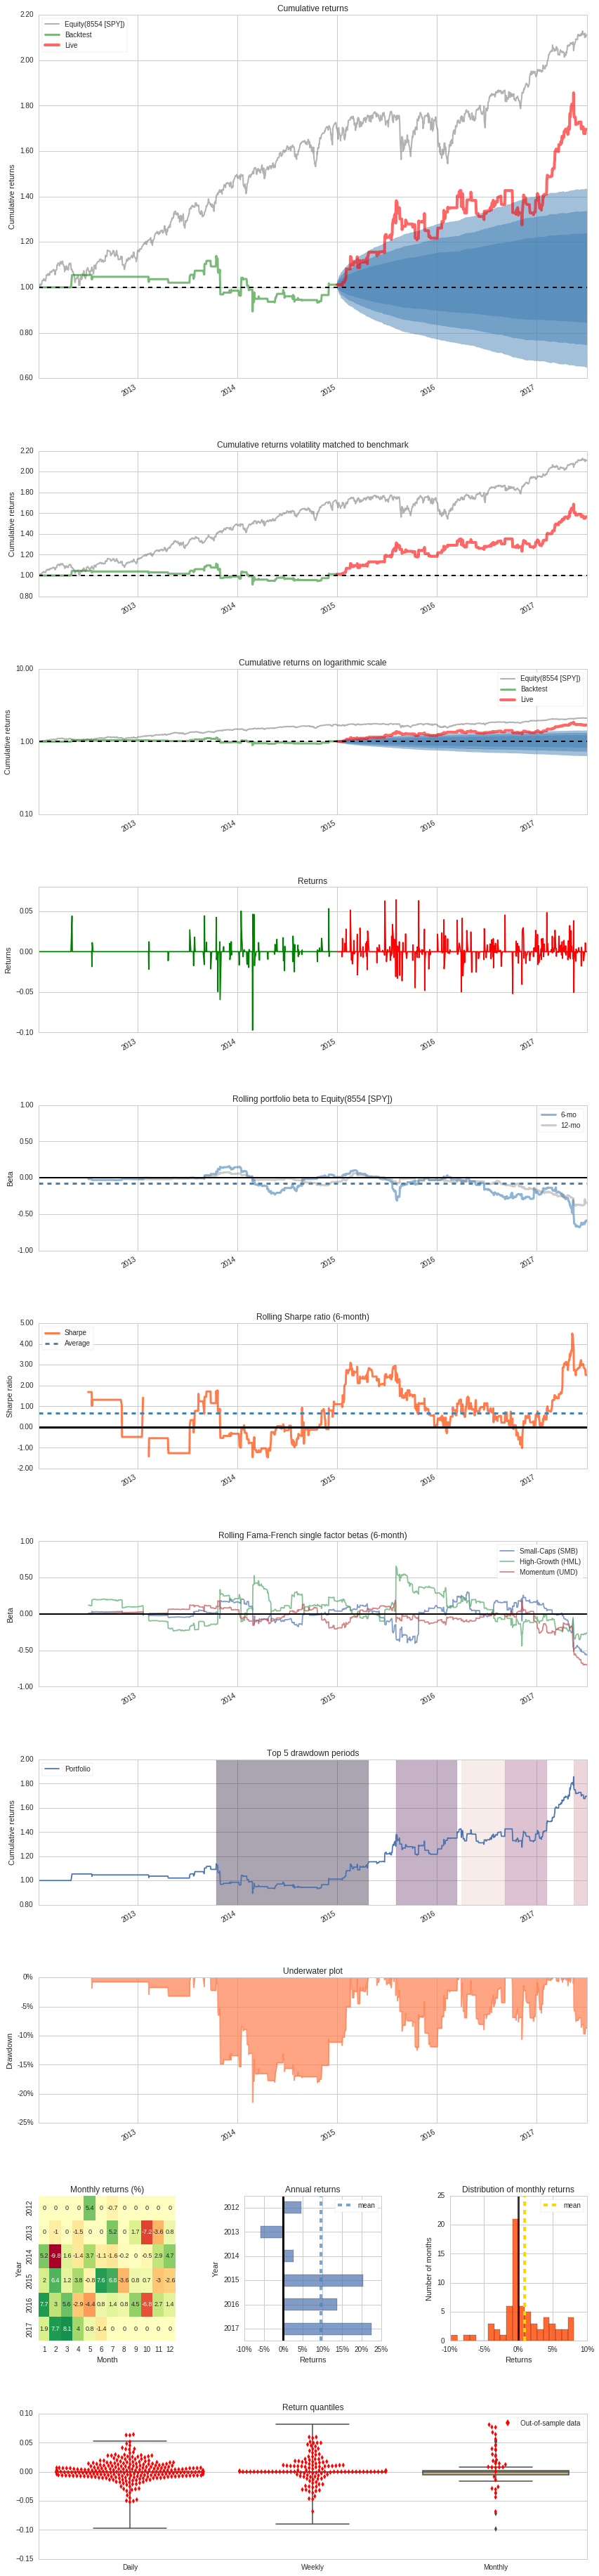

Stress Events,mean,min,max
EZB IR Event,0.00%,0.00%,0.00%
Apr14,-0.07%,-0.94%,0.00%
Oct14,-0.02%,-1.23%,0.47%
Fall2015,-0.13%,-3.61%,2.20%
Recovery,0.02%,-1.85%,4.42%
New Normal,0.05%,-9.72%,6.42%


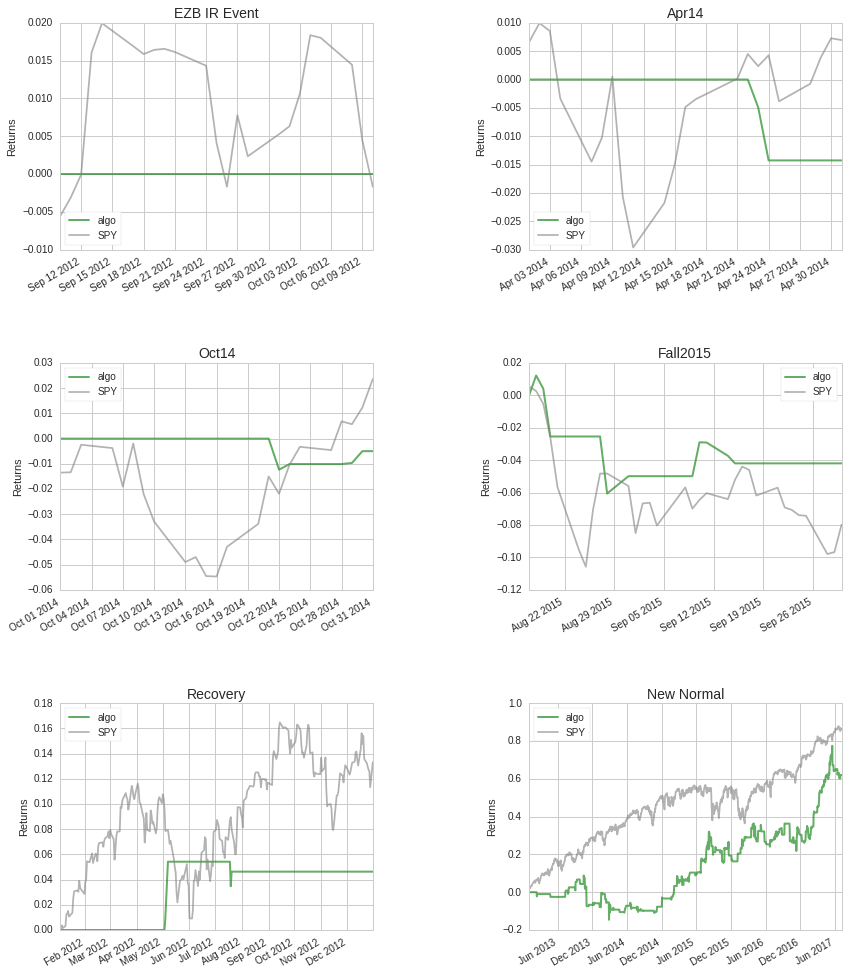

Top 10 long positions of all time,max
BURL-45558,104.39%
CRM-26401,103.35%
GLW-3241,103.01%
TSLA-39840,102.74%
ORCL-5692,102.69%
MON-22140,102.64%
GOOG_L-26578,102.20%
BBY-754,102.01%
AMGN-368,101.95%
NFLX-23709,101.94%


Top 10 short positions of all time,max
JAZZ-33959,-115.54%
BIIB-3806,-110.16%
ILMN-21774,-109.61%
GOOG_L-26578,-106.87%
TSLA-39840,-106.00%
YUM-17787,-105.54%
AVGO-38650,-105.03%
INTU-8655,-104.91%
REGN-6413,-104.86%
CMG-28016,-104.54%


Top 10 positions of all time,max
JAZZ-33959,115.54%
BIIB-3806,110.16%
ILMN-21774,109.61%
GOOG_L-26578,106.87%
TSLA-39840,106.00%
YUM-17787,105.54%
AVGO-38650,105.03%
INTU-8655,104.91%
REGN-6413,104.86%
CMG-28016,104.54%


All positions ever held,max
JAZZ-33959,115.54%
BIIB-3806,110.16%
ILMN-21774,109.61%
GOOG_L-26578,106.87%
TSLA-39840,106.00%
YUM-17787,105.54%
AVGO-38650,105.03%
INTU-8655,104.91%
REGN-6413,104.86%
CMG-28016,104.54%


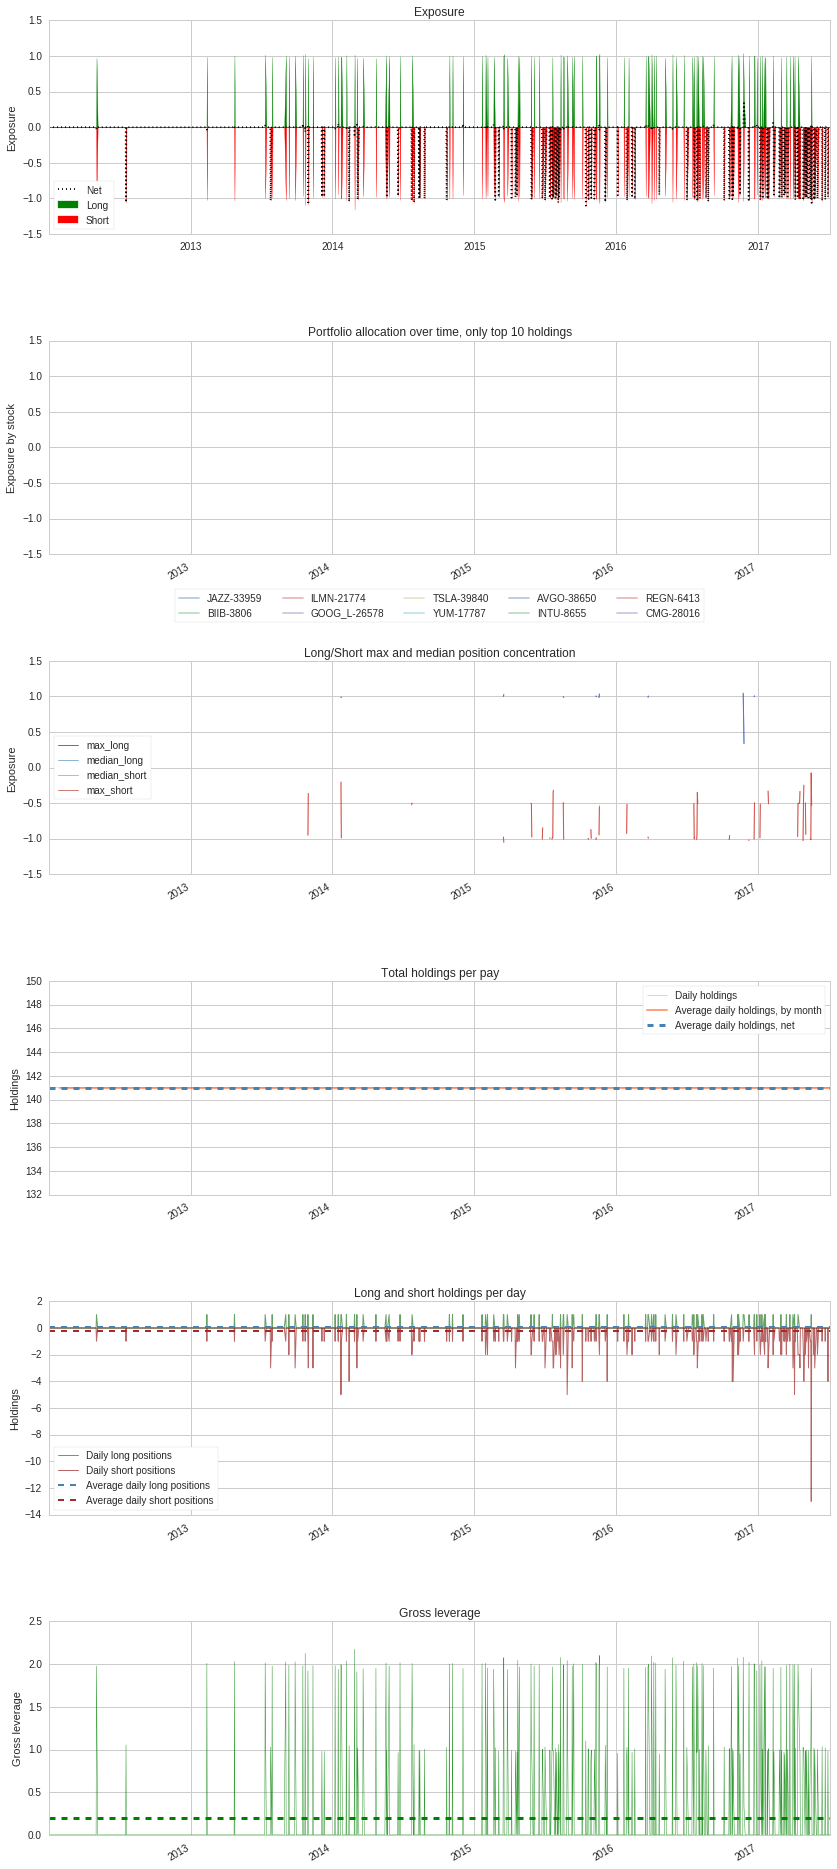

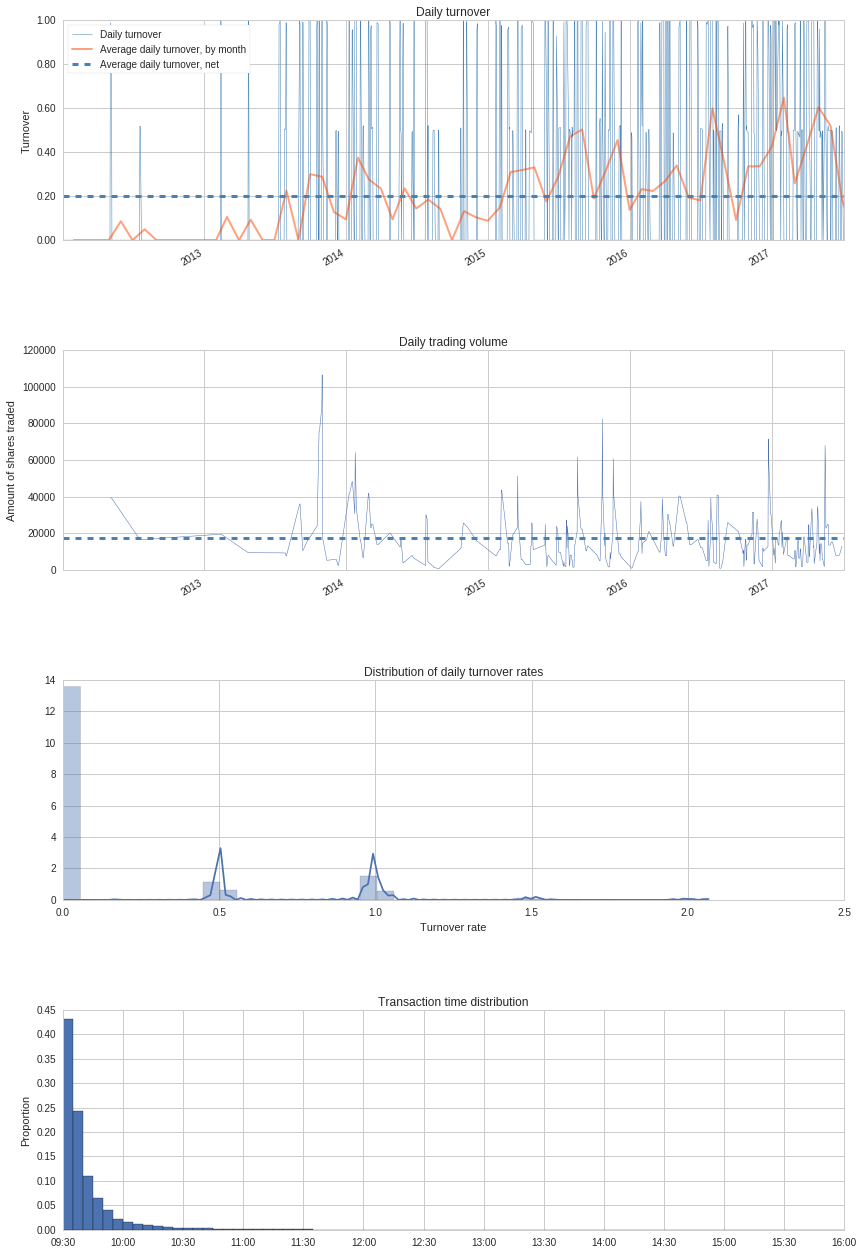

In [40]:
bt_mod.create_full_tear_sheet(live_start_date="2015-01-01")

## Comparison of Results

Overfall this strategy of a good example of how to use sentiment indicators, machine learning with a long/short equity overlay. What is most promising is that the model during the original period from "2015 - 7/2017" outperformed the benchmark with a high Sharpe Ratio and relatively low drawdowns. With these kinds of performance results a fund may want to further test the strategy in a "live" paper trading account. We could also play around with the RFC input paramters, the bull/bear prediction thresholds, different percentiles of long/short equity universes...

At the very least the strategy is a good template to springboard future combinations of these types of strategies. 

Some potential pitfalls of the backtests are:

- Lack of commissions factored into the performance of the strategy. Long/Short equity strategies suffer from constant rebalancing of the portfolio across many securities. This type of strategy is typically only suitable for institutional players like hedge funds who have more power of their fee structures with brokerages. Unfortunately retail DIY Quants who don't have the buying power will most likely not be able to employ strategies that trade frequently.

- Overfitting: Since we used the price changes as 1 of 2 inputs into the RFC model we are exposed to the model being overfit on that particular market regime. As you can see once you back the algorithm to test the earlier period from 2012-2015 the model's performance lagged the benchmark and actually was negative. It would be also interesting to see how the model performed during a bear market like 2008 but this is not possible in Quantopian.

- Blackbox nature of sentiment indicators: Since we are unable to determine how PsychSignal generates it's bullish/bearish indicator we cannot control or predict how these 2 social media sources will behave into the future. Any new alpha generating signal may also lose it's efficacy over time as many more players exploit the edge.

Below we can see how the model performed during the 2 periods: 

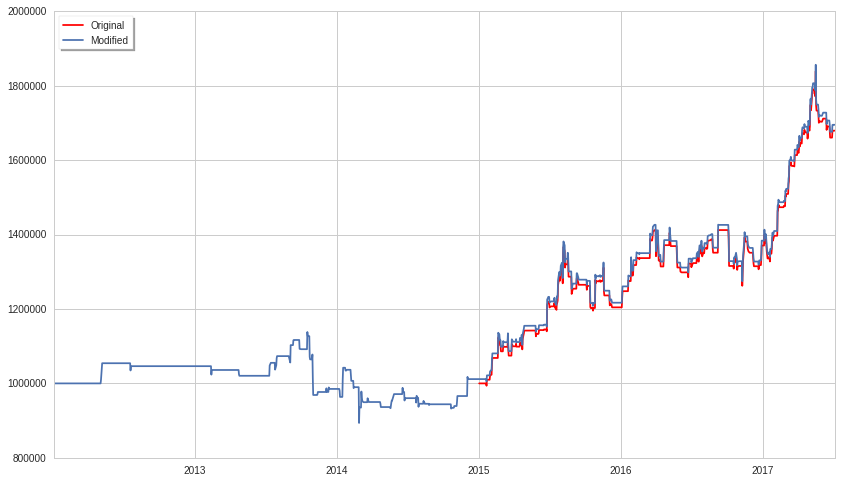

In [41]:
import matplotlib.pyplot as plt

plt.plot(bt_orig.daily_performance.ending_portfolio_value,label = 'Original', color='Red')
plt.plot(bt_mod.daily_performance.ending_portfolio_value,label='Modified')
plt.legend(loc = 2,fontsize= 10,shadow=True);

Disclaimer: This presentation is for informational purposes only and does not constitute an offer to sell, a solicitation to buy, or a recommendation for any security; nor does it constitute an offer to provide investment advisory or other services by TN & Associates. Nothing contained herein constitutes investment advice or offers any opinion with respect to the suitability of any security, and any views expressed herein should not be taken as advice to buy, sell, or hold any security or as an endorsement of any security or company. In preparing the information contained herein, TN & Associates, LLC. has not taken into account the investment needs, objectives, and financial circumstances of any particular investor. Any views expressed and data illustrated herein were prepared based upon information, believed to be reliable, available to Quantopian, Inc. at the time of publication. TN & Associates makes no guarantees as to their accuracy or completeness. All information is subject to change and may quickly become unreliable for various reasons, including changes in market conditions or economic circumstances.